In [2]:
#part of the code is from Adil Moujahid's blog
# http://adilmoujahid.com/posts/2014/07/twitter-analytics/


import json
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

In [3]:
tweets_data_path = 'C:\\Users\\Haijin\\DataScience\\twitter\\output.txt'

In [4]:
tweets_data = []
tweets_file = open(tweets_data_path, "rb")

In [5]:
for line in tweets_file:
    try:
        tweet = json.loads(line)
        #print(tweet.get("text"))
        tweets_data.append(tweet)
    except:
        continue

In [6]:
print(len(tweets_data))

4648


In [7]:
def getSentiment(tweet):
    a=TextBlob(tweet)
    p=a.sentiment.polarity
    if p>0:
        return 1
    elif p<0:
        return -1
    else: return 0

In [8]:
tweets = pd.DataFrame()


In [9]:
tweets['text'] = list(map(lambda tweet:tweet.get("text","null"), tweets_data))
tweets['lang'] =list(map(lambda tweet:tweet.get("lang","null"), tweets_data))
tweets['sentiment']=list(map(lambda tweet:getSentiment(tweet.get("text","null")), tweets_data))
tweets['userid'] = list(map(lambda tweet: tweet.get("user",{}).get("id","null"), tweets_data))
tweets['position'] = list(dfmap(lambda tweet: tweet.get("user",{}).get("position","null"), tweets_data))

In [10]:
tweets_by_sentiment = tweets['sentiment'].value_counts()

In [11]:
tweets_by_sentiment.head()

 0    2334
 1    1258
-1    1056
Name: sentiment, dtype: int64

In [26]:
tweets_by_sentiment.plot(kind='bar')

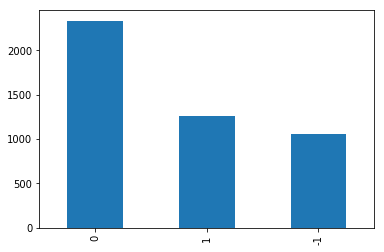

In [27]:
plt.show()
# 0 means neutral, 1 is positive, -1 is negative.

In [ ]:
# it's a big surprising that there is more positive sentiment than negative
# given that twitter use base is considerred more liberal.
# but the problem here could the the sentiment analysis being not accurate enough.
# we see a lot of neutral sentiments, which is not the norm when people talk about Trump.
# and the polarity might be mis-clarified too.
# it's would be a chanllendge as how to correctly do the sentiment analysis. 